## **Urban Noise Clustering**

#### **Getting all the Dependencies**

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns


In [2]:
# Concept: these don't affect Series outputs like value_counts() when printed directly.
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None) 

#### **Data Collection**

In [3]:
df = pd.read_csv("311_noise_complaints.csv")
df.head()

C:\Users\Akanksha\AppData\Local\Temp\ipykernel_26148\3471740042.py:1: DtypeWarning: Columns (17,18,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("311_noise_complaints.csv")


,Created Date,Unique Key,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,BBL,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Open Data Channel Type,Park Facility Name,Park Borough,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,07/18/2025 11:53:00 PM,65592123,NaN,DEP,Department of Environmental Protection,Noise,Noise: Construction Before/After Hours (NM1),NaN,10029.0,NaN,NaN,NaN,NaN,2 AVENUE,EAST 105 STREET,INTERSECTION,MANHATTAN,NaN,NaN,Open,NaN,NaN,NaN,11 MANHATTAN,NaN,MANHATTAN,1000054.0,227082.0,PHONE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.789950,-73.942927,"(40.789949627890586, -73.94292662318264)"
1,07/18/2025 11:44:00 PM,65600030,NaN,DEP,Department of Environmental Protection,Noise,Noise: Construction Before/After Hours (NM1),NaN,10024.0,230 WEST 79 STREET,WEST 79 STREET,AMSTERDAM AVE,BROADWAY,NaN,NaN,ADDRESS,NEW YORK,NaN,NaN,Open,NaN,NaN,NaN,07 MANHATTAN,1.011700e+09,MANHATTAN,989947.0,224764.0,PHONE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.783600,-73.979428,"(40.783599632786924, -73.97942824609544)"
2,07/18/2025 11:32:00 PM,65600031,NaN,DEP,Department of Environmental Protection,Noise,Noise: Construction Before/After Hours (NM1),NaN,10310.0,330 BARD AVENUE,BARD AVENUE,ST AUSTINS PL N,ST AUSTINS PL S,NaN,NaN,ADDRESS,STATEN ISLAND,NaN,NaN,Open,NaN,NaN,NaN,01 STATEN ISLAND,5.001400e+09,STATEN ISLAND,954601.0,171027.0,PHONE,Unspecified,STATEN ISLAND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.636057,-74.106825,"(40.63605656815797, -74.1068252625984)"
3,07/18/2025 11:29:00 PM,65600095,NaN,DEP,Department of Environmental Protection,Noise,"Noise: Boat(Engine,Music,Etc) (NR10)",NaN,11357.0,168-11 12 AVENUE,12 AVENUE,BEND,DEAD END,NaN,NaN,ADDRESS,WHITESTONE,NaN,NaN,Open,NaN,NaN,NaN,07 QUEENS,4.046020e+09,QUEENS,1040801.0,227726.0,ONLINE,Unspecified,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.791550,-73.795771,"(40.79155042461777, -73.79577089126887)"
4,07/18/2025 11:26:00 PM,65592192,NaN,DEP,Department of Environmental Protection,Noise,"Noise: Boat(Engine,Music,Etc) (NR10)",NaN,11357.0,168-11 12 AVENUE,12 AVENUE,BEND,DEAD END,NaN,NaN,ADDRESS,WHITESTONE,NaN,NaN,Open,NaN,NaN,NaN,07 QUEENS,4.046020e+09,QUEENS,1040801.0,227726.0,ONLINE,Unspecified,QUEENS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.791550,-73.795771,"(40.79155042461777, -73.79577089126887)"


In [4]:
df.columns

Index(['Created Date', 'Unique Key', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'BBL', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Open Data Channel Type',
       'Park Facility Name', 'Park Borough', 'Vehicle Type',
       'Taxi Company Borough', 'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Latitude', 'Longitude', 'Location'],
      dtype='object')

In [5]:
data = df[['Created Date', 'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip', 'Latitude', 'Longitude', 'Location']]
data.head()

,Created Date,Complaint Type,Descriptor,Location Type,Incident Zip,Latitude,Longitude,Location
0,07/18/2025 11:53:00 PM,Noise,Noise: Construction Before/After Hours (NM1),NaN,10029.0,40.789950,-73.942927,"(40.789949627890586, -73.94292662318264)"
1,07/18/2025 11:44:00 PM,Noise,Noise: Construction Before/After Hours (NM1),NaN,10024.0,40.783600,-73.979428,"(40.783599632786924, -73.97942824609544)"
2,07/18/2025 11:32:00 PM,Noise,Noise: Construction Before/After Hours (NM1),NaN,10310.0,40.636057,-74.106825,"(40.63605656815797, -74.1068252625984)"
3,07/18/2025 11:29:00 PM,Noise,"Noise: Boat(Engine,Music,Etc) (NR10)",NaN,11357.0,40.791550,-73.795771,"(40.79155042461777, -73.79577089126887)"
4,07/18/2025 11:26:00 PM,Noise,"Noise: Boat(Engine,Music,Etc) (NR10)",NaN,11357.0,40.791550,-73.795771,"(40.79155042461777, -73.79577089126887)"


#### **Data Summary**

In [ ]:
print("Data Summary")
print("---------------")
print(f"Data Shape: {data.shape}\n")

def data_summary(col):
    dtype = str(data[col].dtype)
    unique_values = data[col].nunique()
    missing_pct = round((data[col].isnull().sum() / data.shape[0]) * 100, 2)
    return f"{col:<15} | {dtype:<10} | {unique_values:<7} unique | {missing_pct:>5}% missing"

for col in data.columns:
    print(data_summary(col))

Data Summary
---------------
Data Shape: (793783, 8)

Created Date    | OBJECT     | 690687  unique |   0.0% missing
Complaint Type  | OBJECT     | 8       unique |   0.0% missing
Descriptor      | OBJECT     | 31      unique |   0.0% missing
Location Type   | OBJECT     | 9       unique |  97.4% missing
Incident Zip    | FLOAT64    | 233     unique |  0.86% missing
Latitude        | FLOAT64    | 225104  unique |  1.43% missing
Longitude       | FLOAT64    | 225107  unique |  1.43% missing
Location        | OBJECT     | 225107  unique |  1.43% missing


In [7]:
print(793783 - 778585, 1.43*793783)

15198 1135109.69


#### **Handling Redundancy, and Duplicated Rows and Columns**

In [8]:
print("Number of Duplicated Rows: ", data.duplicated().sum())
data = data.drop_duplicates()

Number of Duplicated Rows:  3957


###### I discovered that 3,957 rows are duplicates only when the unique key is excluded.These could be real duplicates (like system glitches, re-submissions), or rare but valid same-event duplicates.
###### **WHAT SHOULD I DO?** ---- Because clustering cares about patterns, keeping identical rows adds noise and bias (i.e., overrepresents one point artificially). Hence, these will be dropped.

In [9]:
data[["Latitude", "Longitude", "Location"]].sample(5)

,Latitude,Longitude,Location
68503,40.756890,-73.738882,"(40.75689015720723, -73.73888244605422)"
241377,40.862793,-73.907062,"(40.8627930222997, -73.90706197672938)"
583392,40.748878,-73.973924,"(40.74887754198061, -73.97392426630536)"
304686,40.727271,-73.817172,"(40.72727138244315, -73.81717172943856)"
664049,40.752947,-73.892475,"(40.75294742913517, -73.89247476441972)"


In [10]:
data['Complaint Type'].value_counts()

Complaint Type
Noise                                     749624
Sewer                                      19611
Noise Survey                               16302
Collection Truck Noise                      2179
Sanitation Worker or Vehicle Complaint      1976
Plant                                        117
Internal Code                                 16
Water System                                   1
Name: count, dtype: int64

In [11]:
data.drop(columns=['Location', 'Complaint Type'], inplace=True)

#### **Handling Missing Values**

In [12]:
data['Location Type'].value_counts(dropna=False)

Location Type
NaN                769253
Home                 9064
Street/Sidewalk      4492
Bar/Restaurant       2734
Sidewalk             2179
Street               1976
NR4                    59
NR5                    54
Etc) (NR10)            12
NR6                     3
Name: count, dtype: int64

In [13]:
# Data in this column is Highly missing and Cannot be imputed meaningfully.
data = data.drop(columns=['Location Type'])

In [14]:
# Drop rows where all 3 of Incident Zip, Latitude, and Longitude are NaN
data = data.dropna(subset=['Incident Zip', 'Latitude', 'Longitude'], how='all')

for col in ['Incident Zip', 'Latitude', 'Longitude']:
    print(data_summary(col))

Incident Zip    | FLOAT64    | 233     unique |   0.0% missing
Latitude        | FLOAT64    | 225104  unique |  0.58% missing
Longitude       | FLOAT64    | 225107  unique |  0.58% missing


In [15]:
# Imputing using ZIP centroids
zip_centroids = data.groupby('Incident Zip')[['Latitude', 'Longitude']].mean()

for coordinates in ['Latitude', 'Longitude']:
    missing = data[coordinates].isna()
    data.loc[missing, coordinates] = data.loc[missing, 'Incident Zip'].map(zip_centroids[coordinates])

###### If I know that someone lives in ZIP code 10027 (Harlem, NYC), but I don’t know their exact lat/lon, I can reasonably assume they are somewhere near the average of that area, based on everyone else in my dataset from 10027.

In [16]:
data_summary('Latitude'), data_summary('Longitude')

('Latitude        | FLOAT64    | 225280  unique |   0.0% missing',
 'Longitude       | FLOAT64    | 225283  unique |   0.0% missing')

#### **Time Feature Engineering**

In [17]:
data["Created Date"] = pd.to_datetime(
    data["Created Date"], 
    format="%m/%d/%Y %I:%M:%S %p",
    errors='coerce')
data["Created Date"].sample(5)

29025    2025-01-08 08:26:00
248338   2020-09-05 09:56:00
497123   2016-05-20 16:30:00
379933   2018-04-23 07:17:00
661874   2013-05-12 21:54:00
Name: Created Date, dtype: datetime64[ns]

In [18]:
data = data.assign(
    Complaint_Month = data["Created Date"].dt.month,
    Hour = data["Created Date"].dt.hour,
    Day_Of_Week = data["Created Date"].dt.dayofweek, # 0=Monday, 6=Sunday
    Is_Weekend = data["Created Date"].dt.dayofweek >= 5, # 5=Saturday, 6=Sunday
)

data["Is_night"] = (data["Hour"] >= 22) | (data["Hour"] <= 5)

data['Created Day'] = data['Created Date'].dt.date


data.head()

,Created Date,Descriptor,Incident Zip,Latitude,Longitude,Complaint_Month,Hour,Day_Of_Week,Is_Weekend,Is_night,Created Day
0,2025-07-18 23:53:00,Noise: Construction Before/After Hours (NM1),10029.0,40.789950,-73.942927,7,23,4,False,True,2025-07-18
1,2025-07-18 23:44:00,Noise: Construction Before/After Hours (NM1),10024.0,40.783600,-73.979428,7,23,4,False,True,2025-07-18
2,2025-07-18 23:32:00,Noise: Construction Before/After Hours (NM1),10310.0,40.636057,-74.106825,7,23,4,False,True,2025-07-18
3,2025-07-18 23:29:00,"Noise: Boat(Engine,Music,Etc) (NR10)",11357.0,40.791550,-73.795771,7,23,4,False,True,2025-07-18
4,2025-07-18 23:26:00,"Noise: Boat(Engine,Music,Etc) (NR10)",11357.0,40.791550,-73.795771,7,23,4,False,True,2025-07-18


In [19]:
for col in data.columns:
    print(data_summary(col))

Created Date    | DATETIME64[NS] | 685197  unique |   0.0% missing
Descriptor      | OBJECT     | 31      unique |   0.0% missing
Incident Zip    | FLOAT64    | 233     unique |   0.0% missing
Latitude        | FLOAT64    | 225280  unique |   0.0% missing
Longitude       | FLOAT64    | 225283  unique |   0.0% missing
Complaint_Month | INT32      | 12      unique |   0.0% missing
Hour            | INT32      | 24      unique |   0.0% missing
Day_Of_Week     | INT32      | 7       unique |   0.0% missing
Is_Weekend      | BOOL       | 2       unique |   0.0% missing
Is_night        | BOOL       | 2       unique |   0.0% missing
Created Day     | OBJECT     | 5677    unique |   0.0% missing


#### **Cleaning the Descriptor Column**

In [20]:
data['Descriptor'].value_counts().to_frame()

,count
Descriptor,
Noise: Construction Before/After Hours (NM1),302215
"Noise, Barking Dog (NR5)",107182
Noise: Construction Equipment (NC1),105717
Noise: air condition/ventilation equipment (NV1),57287
Noise: Alarms (NR3),56061
Noise: Jack Hammering (NC2),45281
"Noise, Ice Cream Truck (NR4)",23312
Manhole Cover Broken/Making Noise (SB),19017
People Created Noise,16272


In [21]:
# Remove internal-use descriptors
data['Descriptor'] = data['Descriptor'].str.title().str.strip()
data = data[~data['Descriptor'].str.contains("For Dep Internal Use Only", na=False)]

data.head()


,Created Date,Descriptor,Incident Zip,Latitude,Longitude,Complaint_Month,Hour,Day_Of_Week,Is_Weekend,Is_night,Created Day
0,2025-07-18 23:53:00,Noise: Construction Before/After Hours (Nm1),10029.0,40.789950,-73.942927,7,23,4,False,True,2025-07-18
1,2025-07-18 23:44:00,Noise: Construction Before/After Hours (Nm1),10024.0,40.783600,-73.979428,7,23,4,False,True,2025-07-18
2,2025-07-18 23:32:00,Noise: Construction Before/After Hours (Nm1),10310.0,40.636057,-74.106825,7,23,4,False,True,2025-07-18
3,2025-07-18 23:29:00,"Noise: Boat(Engine,Music,Etc) (Nr10)",11357.0,40.791550,-73.795771,7,23,4,False,True,2025-07-18
4,2025-07-18 23:26:00,"Noise: Boat(Engine,Music,Etc) (Nr10)",11357.0,40.791550,-73.795771,7,23,4,False,True,2025-07-18


In [22]:
data['Descriptor'].value_counts().to_frame()

,count
Descriptor,
Noise: Construction Before/After Hours (Nm1),302215
"Noise, Barking Dog (Nr5)",107182
Noise: Construction Equipment (Nc1),105717
Noise: Air Condition/Ventilation Equipment (Nv1),57287
Noise: Alarms (Nr3),56061
Noise: Jack Hammering (Nc2),45281
"Noise, Ice Cream Truck (Nr4)",23312
Manhole Cover Broken/Making Noise (Sb),19017
People Created Noise,16272


In [23]:
descriptor_map = {
    'construction': [
        "Noise: Construction Before/After Hours (Nm1)",
        "Noise: Construction Equipment (Nc1)",
        "Noise: Jack Hammering (Nc2)",
        "Noise: Manufacturing Noise (Nk1)"
    ],
    'animals': [
        "Noise, Barking Dog (Nr5)",
        "Noise, Other Animals (Nr6)"
    ],
    'ventilation': [
        "Noise: Air Condition/Ventilation Equipment (Nv1)",
        "Noise: Air Condition/Ventilation Equip, Commercial (Nj2)",
        "Noise: Air Condition/Ventilation Equip, Residential (Nj1)"
    ],
    'alarms': [
        "Noise: Alarms (Nr3)"
    ],
    'music': [
        "Noise: Loud Music/Nighttime(Mark Date And Time) (Np1)",
        "Noise: Loud Music/Daytime (Mark Date And Time) (Nn1)"
    ],
    'truck': [
        "Noise, Ice Cream Truck (Nr4)",
        "Noise: Private Carting Noise (Nq1)",
        "21 Collection Truck Noise",
        "Noise: Vehicle (Nr2)"
    ],
    'garden': [
        "Noise: Lawn Care Equipment (Ncl)", 
        "Plants- Noise Related Problems (Pn1)"
    ],
    'sewage': [
        "Manhole Cover Broken/Making Noise (Sb)"
    ],
    'people/other': [
        "People Created Noise",
        "Noise",
        "Noise: Boat(Engine,Music,Etc) (Nr10)",
        "Noise: Boat(Engine",
        "Noise: Other Noise Sources (Use Comments) (Nzz)"
    ]
}


flat_map = {desc: group for group, desc_list in descriptor_map.items() for desc in desc_list}

data['Descriptor_group'] = data['Descriptor'].map(flat_map)

In [24]:
data.head()

,Created Date,Descriptor,Incident Zip,Latitude,Longitude,Complaint_Month,Hour,Day_Of_Week,Is_Weekend,Is_night,Created Day,Descriptor_group
0,2025-07-18 23:53:00,Noise: Construction Before/After Hours (Nm1),10029.0,40.789950,-73.942927,7,23,4,False,True,2025-07-18,construction
1,2025-07-18 23:44:00,Noise: Construction Before/After Hours (Nm1),10024.0,40.783600,-73.979428,7,23,4,False,True,2025-07-18,construction
2,2025-07-18 23:32:00,Noise: Construction Before/After Hours (Nm1),10310.0,40.636057,-74.106825,7,23,4,False,True,2025-07-18,construction
3,2025-07-18 23:29:00,"Noise: Boat(Engine,Music,Etc) (Nr10)",11357.0,40.791550,-73.795771,7,23,4,False,True,2025-07-18,people/other
4,2025-07-18 23:26:00,"Noise: Boat(Engine,Music,Etc) (Nr10)",11357.0,40.791550,-73.795771,7,23,4,False,True,2025-07-18,people/other


#### **Graphical EDA**

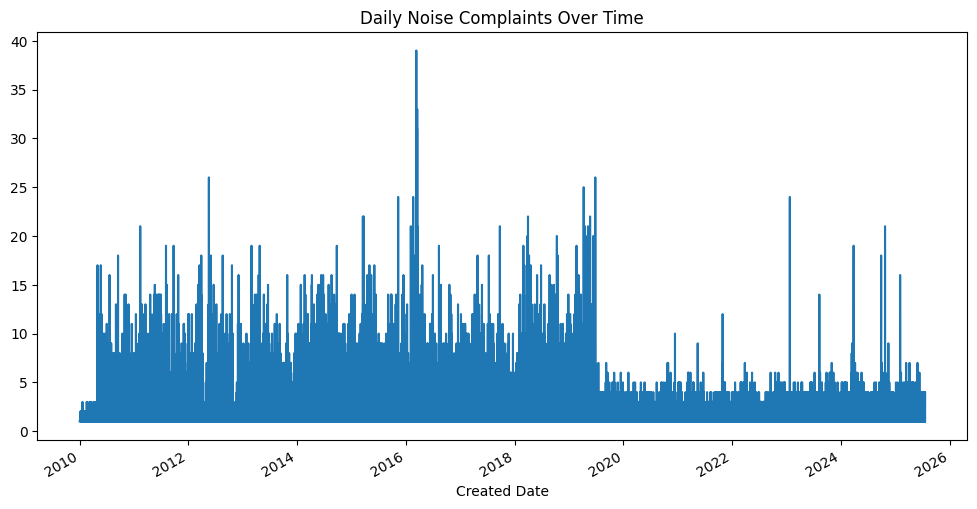

In [25]:
daily_counts = data.groupby('Created Date').size()
daily_counts.plot(kind='line', figsize=(12, 6), title='Daily Noise Complaints Over Time')
plt.show()

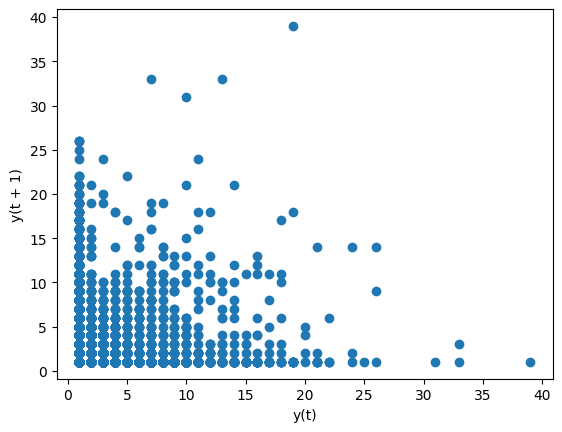

In [26]:
pd.plotting.lag_plot(daily_counts, lag=1)
plt.show()

#### **Feature Engineering for Clustering**